In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df_machine = pd.read_csv('machine data.csv')
df_machine.head()

,timestamp,machine_id,vibration,acoustic,temperature,current,IMF_1,IMF_2,IMF_3,label
0,01-07-2024 08:00,M01,0.822,0.645,66.85,13.04,0.196,0.033,0.000,0
1,01-07-2024 08:01,M01,1.398,0.834,76.20,15.08,0.345,0.132,0.001,1
2,01-07-2024 08:02,M01,0.856,0.590,67.03,12.30,0.187,0.017,0.002,0
3,01-07-2024 08:03,M01,0.793,0.544,65.04,11.69,0.196,-0.060,0.003,0
4,01-07-2024 08:04,M01,1.279,0.721,78.19,14.84,0.330,-0.115,0.004,1


In [3]:
df_machine.shape

(1800, 10)

**Interpretation**
  - the data contain 1800 tuples
 - the data conatain 10 attribute

**Description about dataset**

1️⃣ Timestamp

Type: Date-Time

Shows the exact date and time of data collection

Used for time-series analysis

Helps track machine condition over time

2️⃣ Machine_ID

Type: Categorical (Text)

Unique identification number of each machine

Helps differentiate data from multiple machines

Example: M01, M02

3️⃣ Vibration

Type: Numerical (Float)

Measures mechanical vibration of the machine

High value indicates possible bearing wear or imbalance

Used for fault detection

4️⃣ Acoustic

Type: Numerical (Float)

Measures sound level produced by the machine

Abnormal sound indicates internal damage

Used for condition monitoring

5️⃣ Temperature

Type: Numerical (Float)

Unit: Degree Celsius (°C)

Indicates machine operating temperature

High temperature may indicate overheating

6️⃣ Current

Type: Numerical (Float)

Unit: Ampere (A)

Shows electrical current consumption

Sudden increase may indicate overload

7️⃣ IMF_1 (Intrinsic Mode Function 1)

Type: Numerical (Float)

High-frequency component of vibration signal

Extracted using EMD (Empirical Mode Decomposition)

Helps detect early faults

8️⃣ IMF_2 (Intrinsic Mode Function 2)

Type: Numerical (Float)

Medium-frequency component

Represents moderate fault characteristics

9️⃣ IMF_3 (Intrinsic Mode Function 3)

Type: Numerical (Float)

Low-frequency component

Represents long-term degradation patterns

🔟 Label

Type: Binary (0 or 1)

Target variable

0 → Normal condition

1 → Fault / Degradation

Used to train machine learning model

**Data preprocessing**

In [4]:
df_machine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   timestamp    1800 non-null   object 
 1   machine_id   1800 non-null   object 
 2   vibration    1800 non-null   float64
 3   acoustic     1800 non-null   float64
 4   temperature  1800 non-null   float64
 5   current      1800 non-null   float64
 6   IMF_1        1800 non-null   float64
 7   IMF_2        1800 non-null   float64
 8   IMF_3        1800 non-null   float64
 9   label        1800 non-null   int64  
dtypes: float64(7), int64(1), object(2)
memory usage: 140.8+ KB


**Interpretation**
 - 7 numerical features: vibration, acoustic, temperature, current, IMF_1, IMF_2, IMF_3
 - 2 categorical features: timestamp, machine_id
 - 1 target variable: label

In [5]:
df_machine.isnull().sum()

timestamp      0
machine_id     0
vibration      0
acoustic       0
temperature    0
current        0
IMF_1          0
IMF_2          0
IMF_3          0
label          0
dtype: int64

**interpretation**
 - there is no null value

In [6]:
df_machine.describe().T

,count,mean,std,min,25%,50%,75%,max
vibration,1800.0,0.843295,0.136690,0.645,0.769,0.8050,0.85100,1.405
acoustic,1800.0,0.633898,0.107989,0.430,0.572,0.6090,0.65125,1.083
temperature,1800.0,66.355722,4.448129,58.360,63.730,65.3550,66.99000,85.160
current,1800.0,12.328600,1.094510,10.290,11.700,12.0800,12.48000,16.940
IMF_1,1800.0,0.168738,0.056533,0.073,0.123,0.1660,0.20700,0.393
IMF_2,1800.0,0.000072,0.073104,-0.180,-0.058,-0.0010,0.05900,0.187
IMF_3,1800.0,0.000673,0.036034,-0.050,-0.037,0.0035,0.03700,0.050
label,1800.0,0.112222,0.315727,0.000,0.000,0.0000,0.00000,1.000


In [7]:
# Select numerical columns
num_cols = ['vibration', 'acoustic', 'temperature',
            'current', 'IMF_1', 'IMF_2', 'IMF_3']

# IQR Method
for col in num_cols:
    Q1 = df_machine[col].quantile(0.25)
    Q3 = df_machine[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df_machine[(df_machine[col] < lower_bound) | (df_machine[col] > upper_bound)]

    print(f"{col} → Number of Outliers: {outliers.shape[0]}")


vibration → Number of Outliers: 203
acoustic → Number of Outliers: 192
temperature → Number of Outliers: 205
current → Number of Outliers: 202
IMF_1 → Number of Outliers: 23
IMF_2 → Number of Outliers: 0
IMF_3 → Number of Outliers: 0


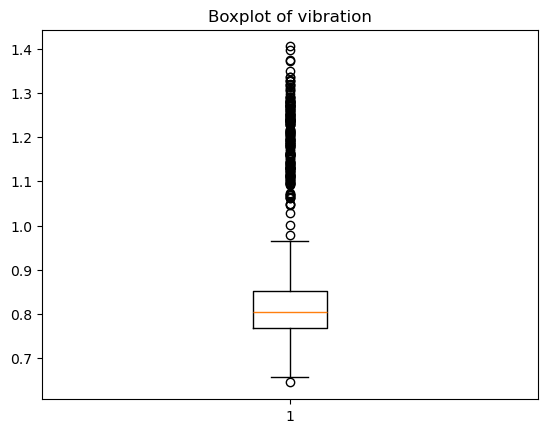

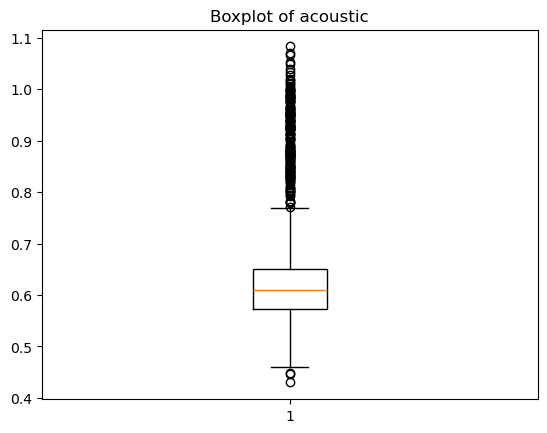

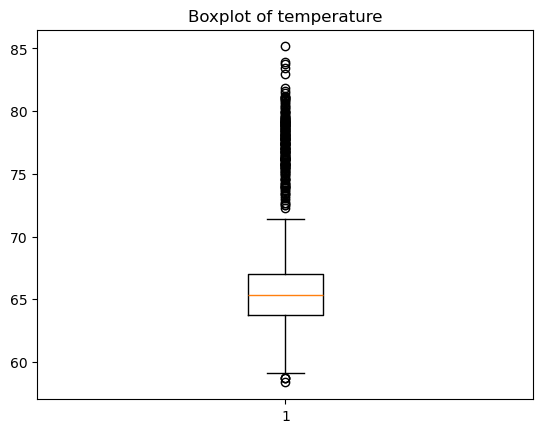

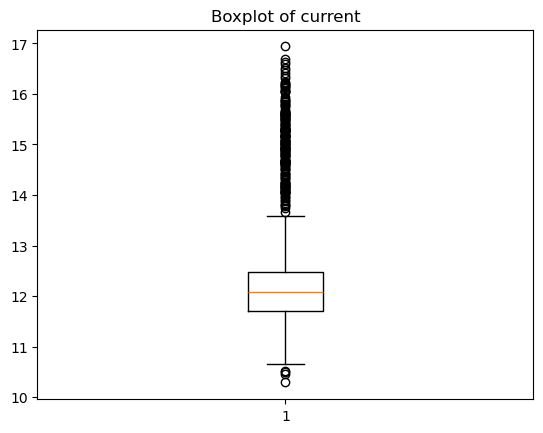

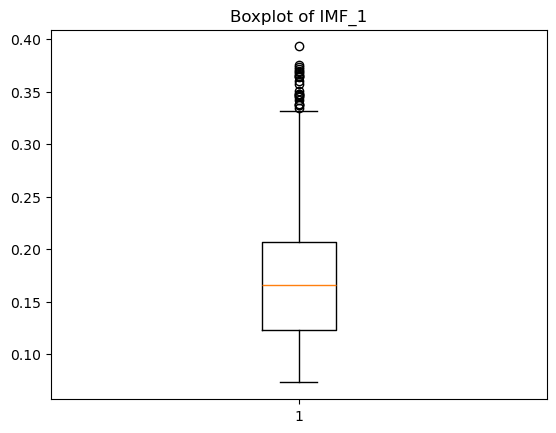

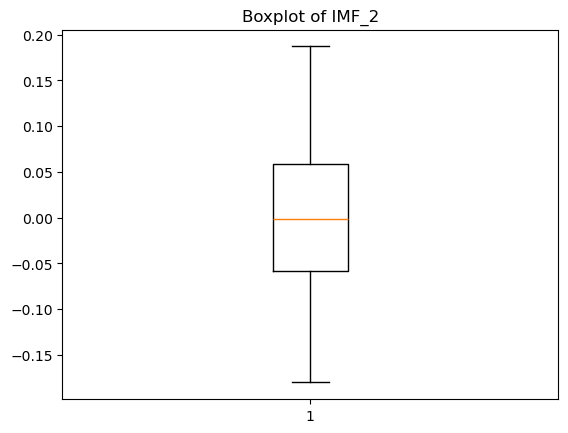

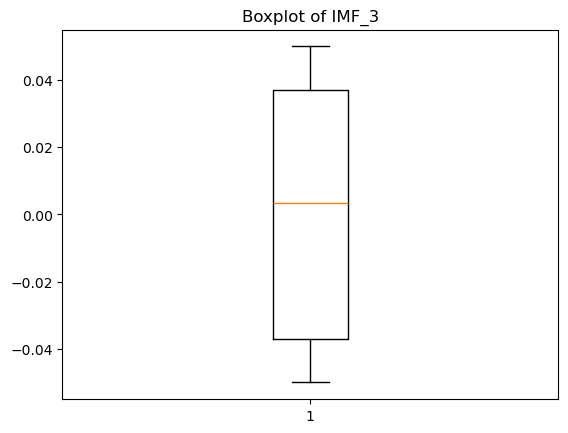

In [8]:
num_cols = ['vibration', 'acoustic', 'temperature',
            'current', 'IMF_1', 'IMF_2', 'IMF_3']

for col in num_cols:
    plt.figure()
    plt.boxplot(df_machine[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


**Interpretation**
 - vibration contain outlier
- acoustic contain oulier
- temprature contain oulier
- imf1 contain outlier

**outlier removing process**


In [9]:
df_machine.shape

(1800, 10)

**interpretation**
 - before outlier processing data contain 1800 tuples

In [10]:
df_clean = df_machine.copy()

In [11]:
df_clean.shape

(1800, 10)

In [12]:
# Select numerical columns
num_cols = ['vibration', 'acoustic', 'temperature',
            'current', 'IMF_1', 'IMF_2', 'IMF_3']

# IQR Method
for col in num_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_clean[col]=np.where(df_clean[col]<lower_bound,lower_bound,
                           np.where(df_clean[col]>upper_bound,upper_bound,df_clean[col]))

print("Label counts after first outlier removal pass:")
print(df_clean['label'].value_counts())

Label counts after first outlier removal pass:
label
0    1598
1     202
Name: count, dtype: int64


In [13]:
df_clean.shape

(1800, 10)

In [14]:
df_clean.tail()

,timestamp,machine_id,vibration,acoustic,temperature,current,IMF_1,IMF_2,IMF_3,label
1795,01-07-2024 17:55,M03,0.974,0.770125,71.88,13.65,0.261,0.041,-0.031,1
1796,01-07-2024 17:56,M03,0.838,0.545000,64.28,12.08,0.146,-0.062,-0.030,0
1797,01-07-2024 17:57,M03,0.786,0.593000,65.44,12.23,0.110,0.038,-0.029,0
1798,01-07-2024 17:58,M03,0.767,0.550000,62.01,11.35,0.225,0.106,-0.028,0
1799,01-07-2024 17:59,M03,0.934,0.643000,64.18,11.83,0.122,0.015,-0.028,0


In [15]:
df_clean = df_clean.reset_index(drop=True)

print(df_clean.head())


          timestamp machine_id  vibration  acoustic  temperature  current  \
0  01-07-2024 08:00        M01      0.822  0.645000        66.85    13.04   
1  01-07-2024 08:01        M01      0.974  0.770125        71.88    13.65   
2  01-07-2024 08:02        M01      0.856  0.590000        67.03    12.30   
3  01-07-2024 08:03        M01      0.793  0.544000        65.04    11.69   
4  01-07-2024 08:04        M01      0.974  0.721000        71.88    13.65   

   IMF_1  IMF_2  IMF_3  label  
0  0.196  0.033  0.000      0  
1  0.333  0.132  0.001      1  
2  0.187  0.017  0.002      0  
3  0.196 -0.060  0.003      0  
4  0.330 -0.115  0.004      1  


In [16]:
df_clean.tail()

,timestamp,machine_id,vibration,acoustic,temperature,current,IMF_1,IMF_2,IMF_3,label
1795,01-07-2024 17:55,M03,0.974,0.770125,71.88,13.65,0.261,0.041,-0.031,1
1796,01-07-2024 17:56,M03,0.838,0.545000,64.28,12.08,0.146,-0.062,-0.030,0
1797,01-07-2024 17:57,M03,0.786,0.593000,65.44,12.23,0.110,0.038,-0.029,0
1798,01-07-2024 17:58,M03,0.767,0.550000,62.01,11.35,0.225,0.106,-0.028,0
1799,01-07-2024 17:59,M03,0.934,0.643000,64.18,11.83,0.122,0.015,-0.028,0


**interpretation**
  - the dataset is reindex and currently in order

**check oulier remove or not in clean dataset**

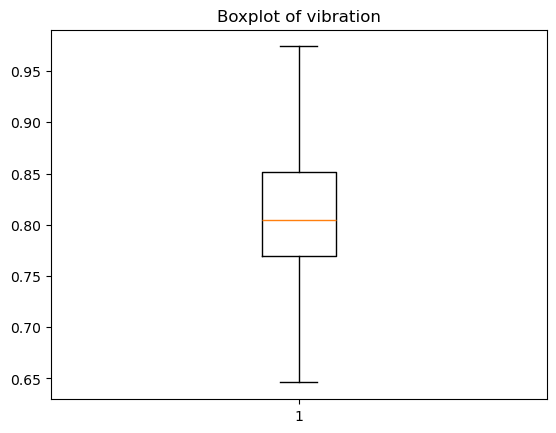

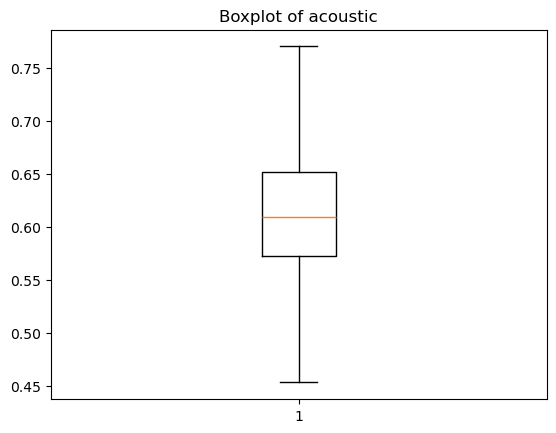

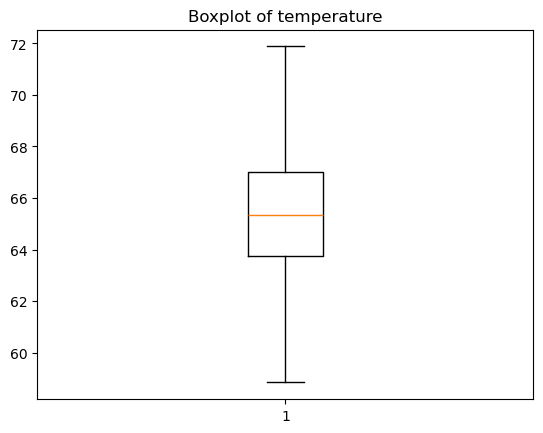

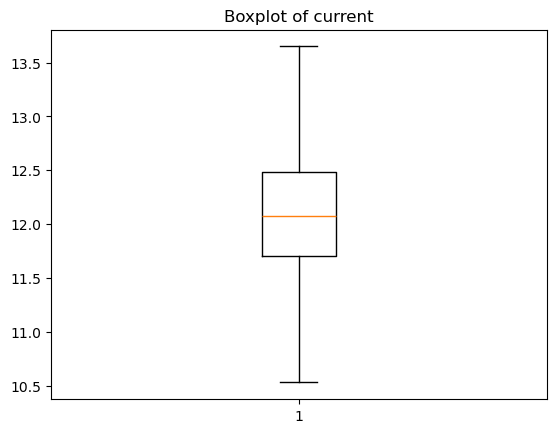

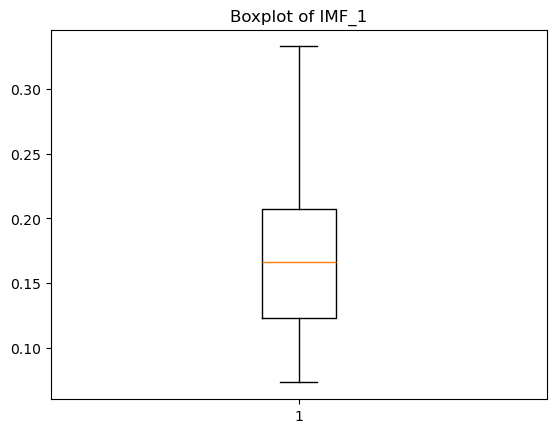

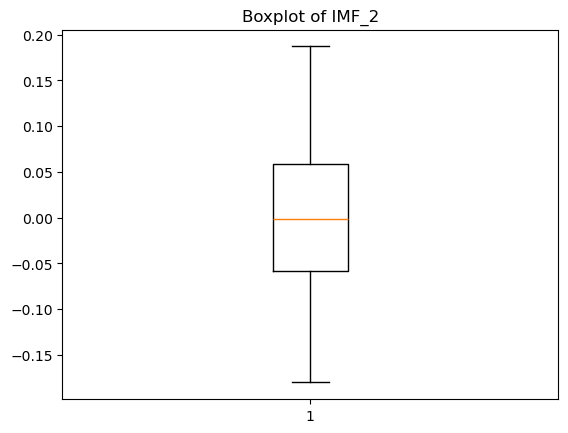

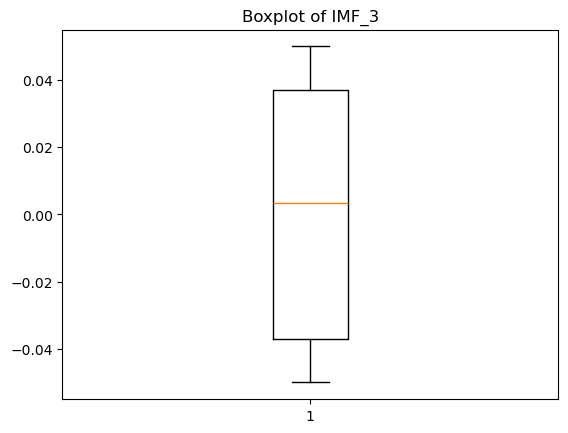

In [17]:
num_cols = ['vibration', 'acoustic', 'temperature',
            'current', 'IMF_1', 'IMF_2', 'IMF_3']

for col in num_cols:
    plt.figure()
    plt.boxplot(df_clean[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [18]:


# Select numerical columns
num_cols = ['vibration', 'acoustic', 'temperature',
            'current', 'IMF_1', 'IMF_2', 'IMF_3']

# IQR Method
for col in num_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)]

    print(f"{col} → Number of Outliers: {outliers.shape[0]}")


vibration → Number of Outliers: 0
acoustic → Number of Outliers: 0
temperature → Number of Outliers: 0
current → Number of Outliers: 0
IMF_1 → Number of Outliers: 0
IMF_2 → Number of Outliers: 0
IMF_3 → Number of Outliers: 0


In [19]:
# Select numerical columns
num_cols = ['vibration', 'acoustic', 'temperature',
            'current', 'IMF_1', 'IMF_2', 'IMF_3']

# IQR Method
for col in num_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
# print(lower_bound)
# print(upper_bound)
    df_clean = df_clean[
        (df_clean[col] >= lower_bound) &
        (df_clean[col] <= upper_bound)
    ]
print("Label counts after second outlier removal pass:")
print(df_clean['label'].value_counts())

Label counts after second outlier removal pass:
label
0    1598
1     202
Name: count, dtype: int64


In [20]:
df_clean.shape

(1800, 10)

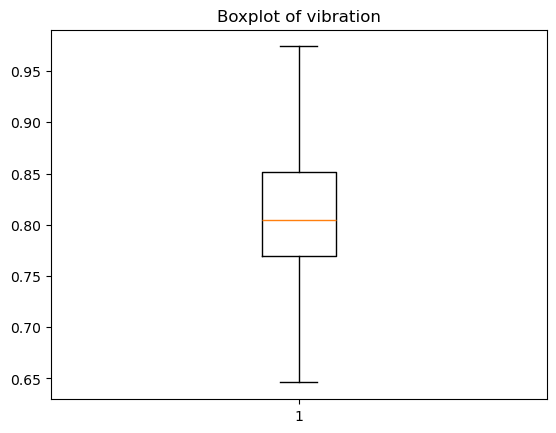

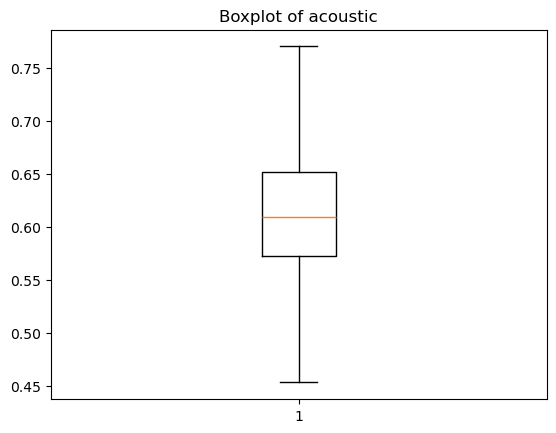

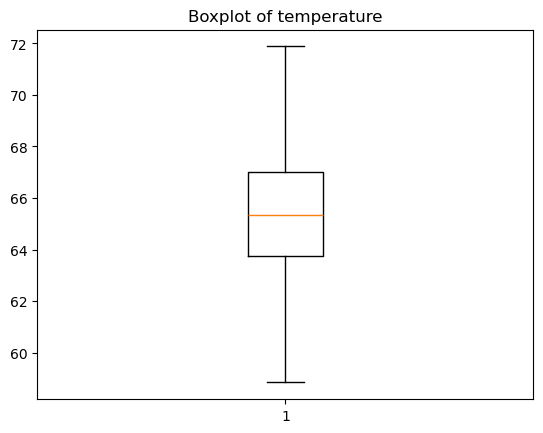

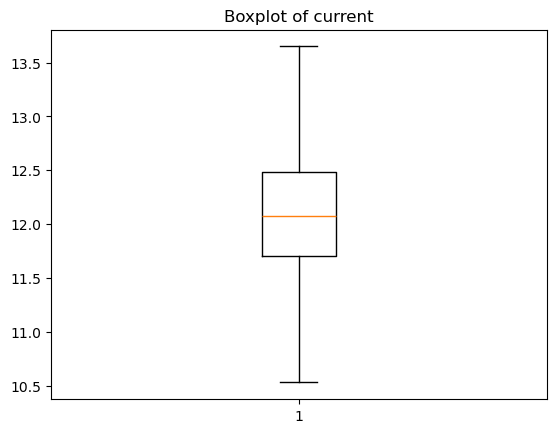

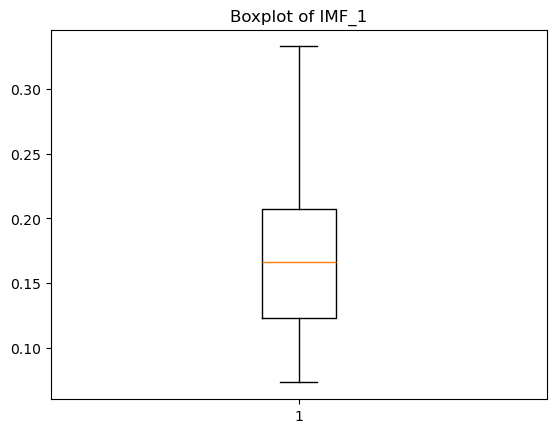

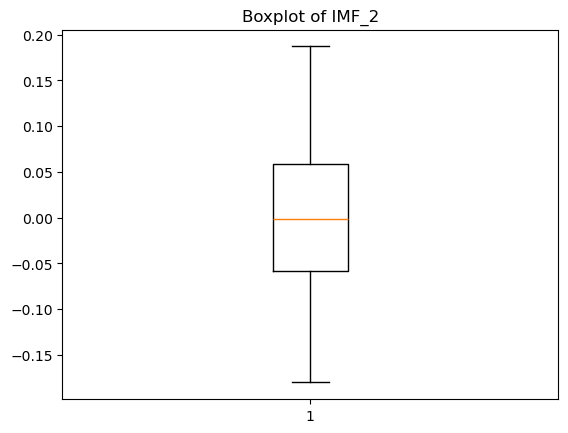

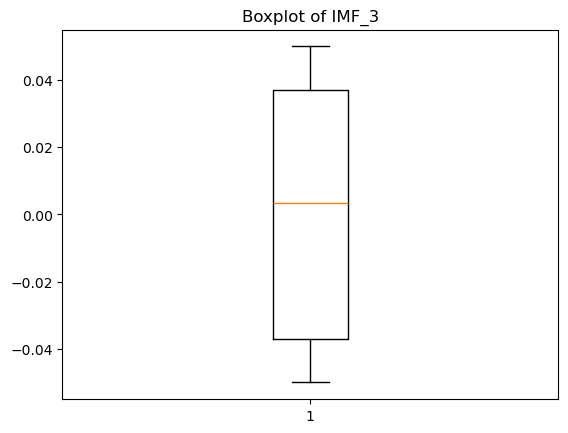

In [21]:
for col in num_cols:
    plt.figure()
    plt.boxplot(df_clean[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


In [22]:
# IQR Method
for col in num_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)]

    print(f"{col} → Number of Outliers: {outliers.shape[0]}")


vibration → Number of Outliers: 0
acoustic → Number of Outliers: 0
temperature → Number of Outliers: 0
current → Number of Outliers: 0
IMF_1 → Number of Outliers: 0
IMF_2 → Number of Outliers: 0
IMF_3 → Number of Outliers: 0


In [23]:
df_clean=df_clean.drop(columns=['timestamp','machine_id'])

In [24]:
# reindexing
df_clean = df_clean.reset_index(drop=True)

df_clean.tail()

,vibration,acoustic,temperature,current,IMF_1,IMF_2,IMF_3,label
1795,0.974,0.770125,71.88,13.65,0.261,0.041,-0.031,1
1796,0.838,0.545000,64.28,12.08,0.146,-0.062,-0.030,0
1797,0.786,0.593000,65.44,12.23,0.110,0.038,-0.029,0
1798,0.767,0.550000,62.01,11.35,0.225,0.106,-0.028,0
1799,0.934,0.643000,64.18,11.83,0.122,0.015,-0.028,0


**interpretation**
 - the oulier is remove from the dataset
  - the outlier remove dataset is store in df_clean
  - before the outlier removing df_machine is contain 1800 tuple
   - after removing the dataser df_clean is contain 1547 tuple

# **Important**
 - perforn eda and ml model on df_clean dataset
  - for the ml model use classification model suggestion
   - knn
   - randomforest
   - logistic regression
   - dicision tree


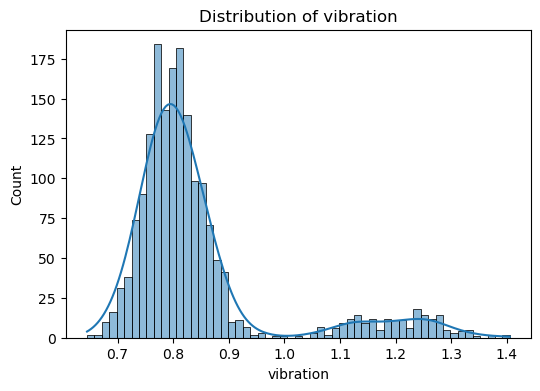

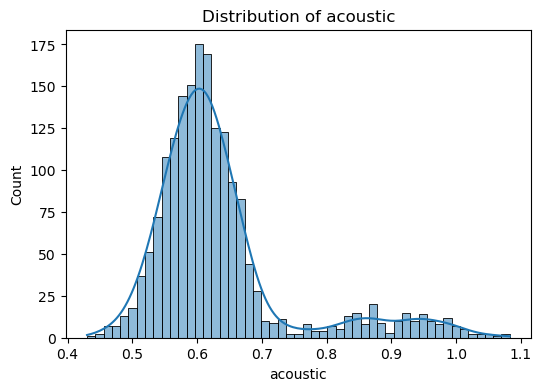

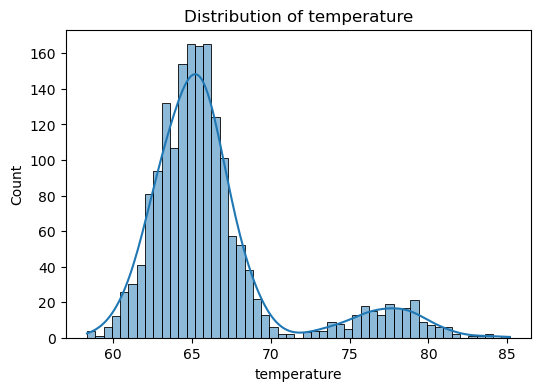

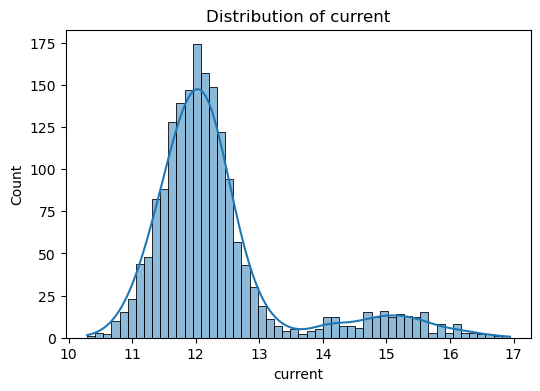

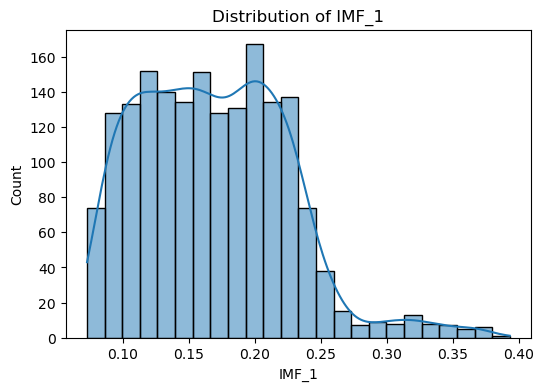

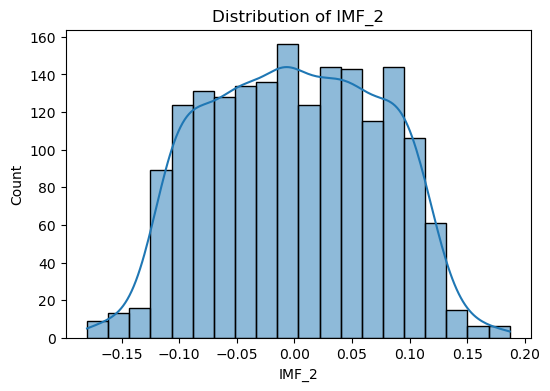

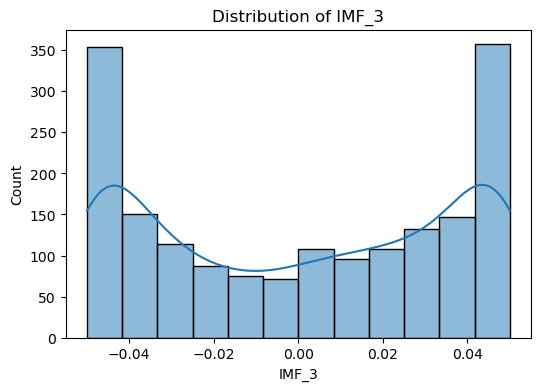

In [25]:
# now performing EDA (by jainam)

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df_machine[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


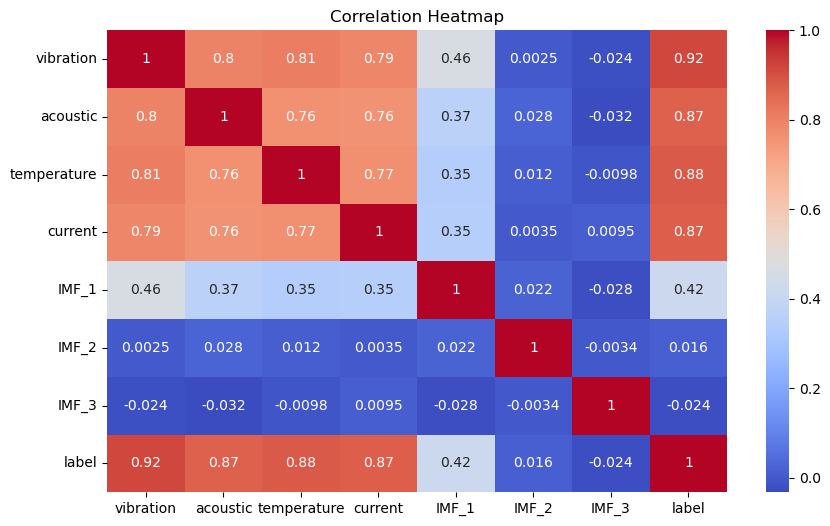

In [26]:
plt.figure(figsize=(10,6))
sns.heatmap(df_machine.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


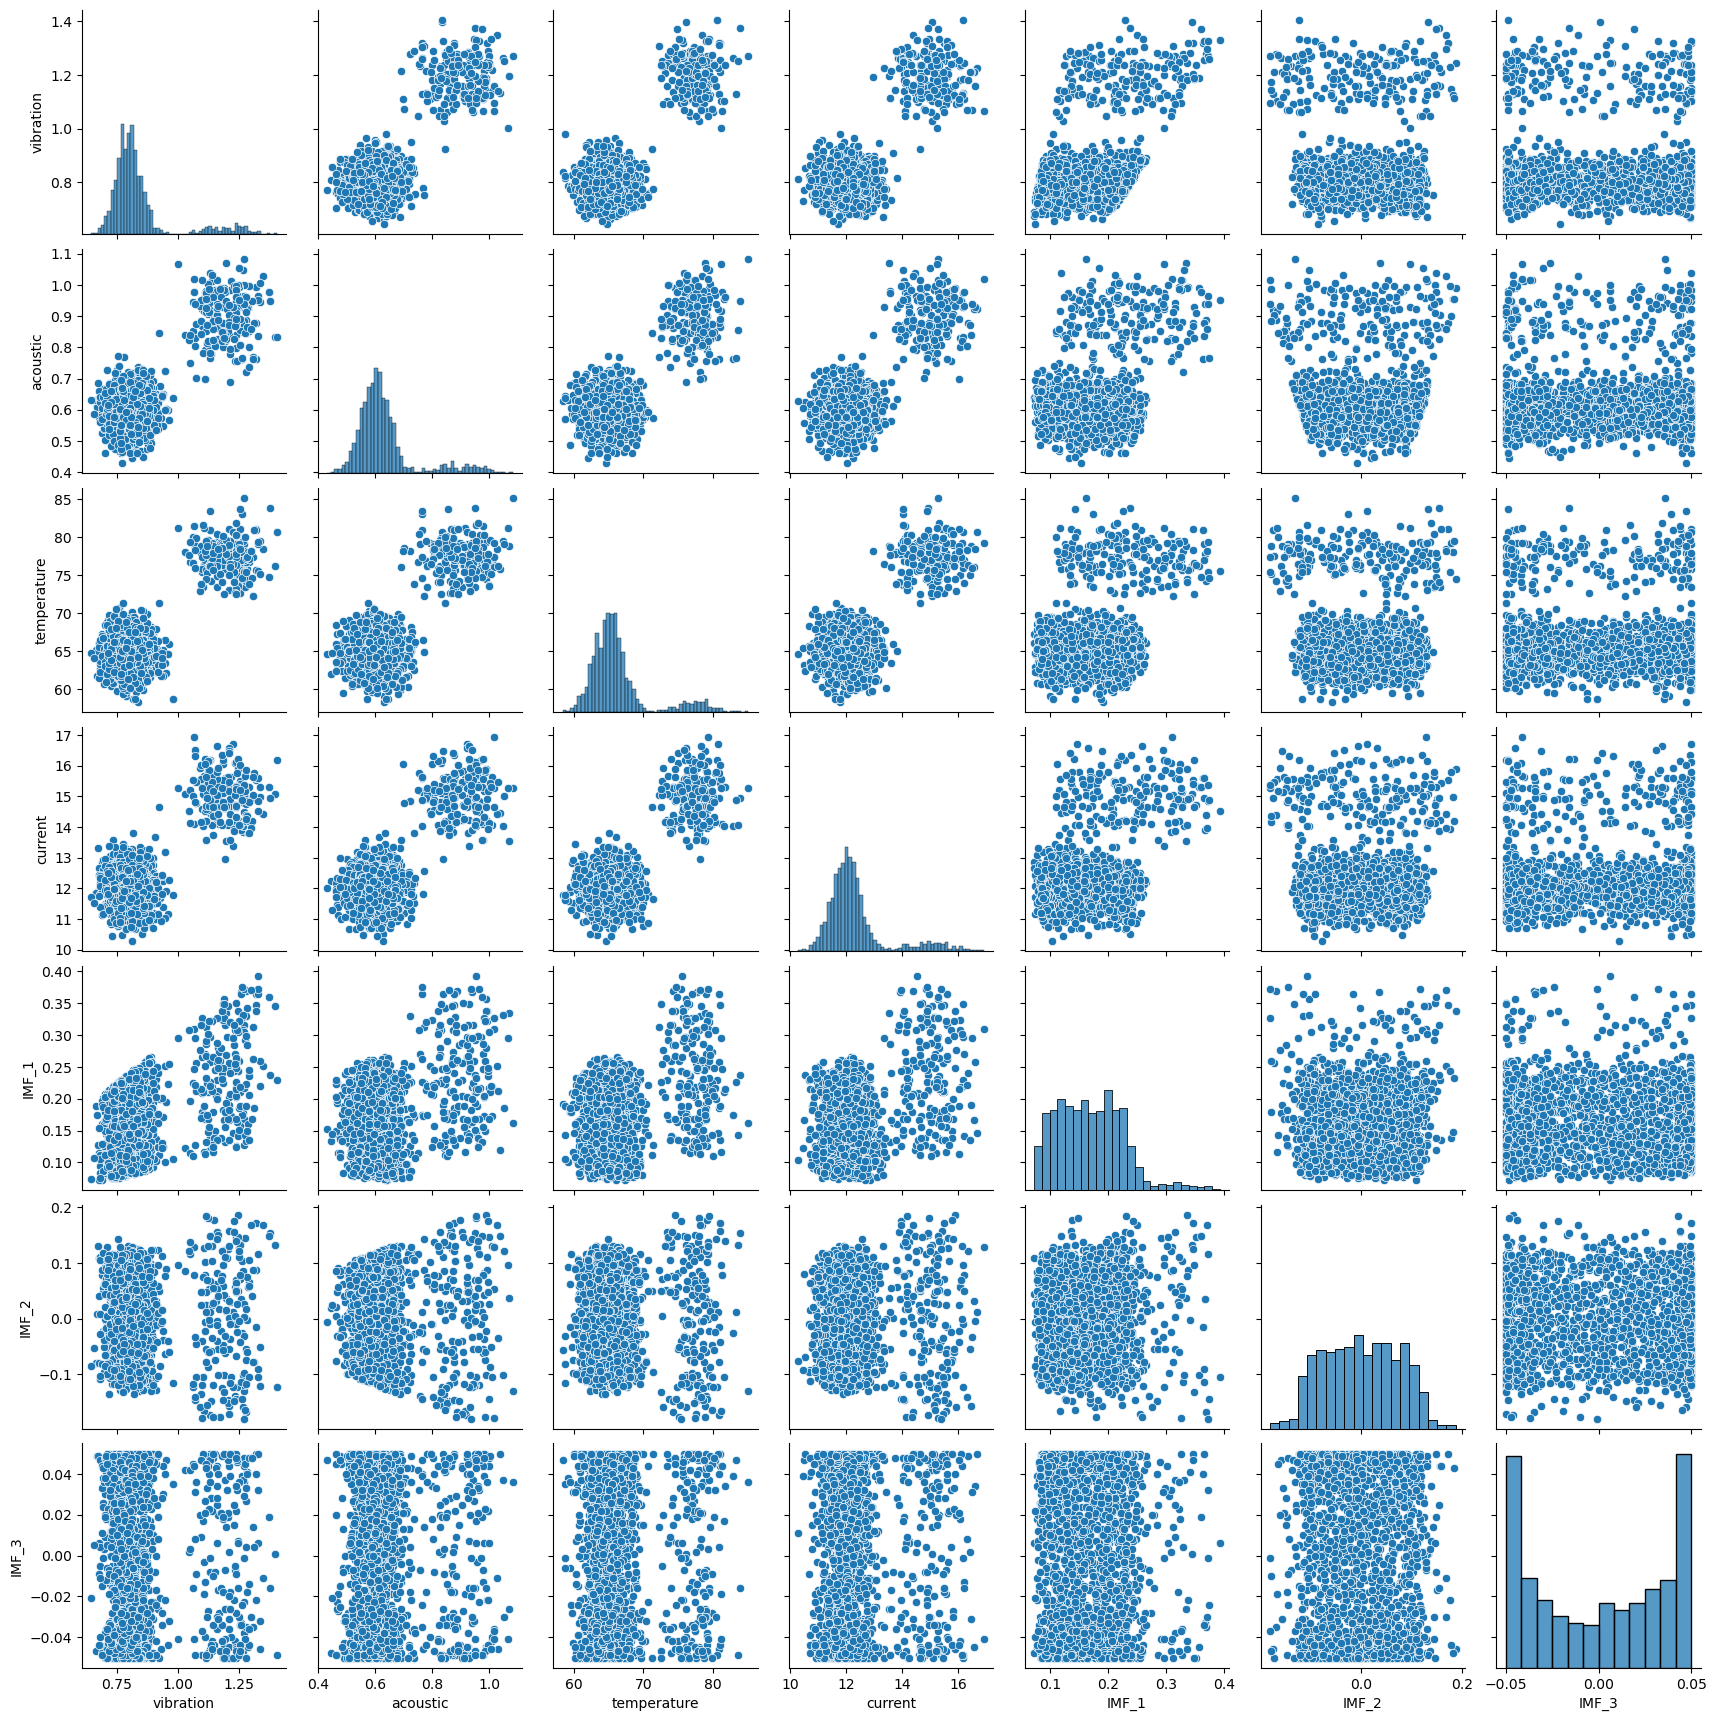

In [27]:
sns.pairplot(df_machine[num_cols])
plt.show()


In [28]:
df_machine[num_cols].skew()


vibration      2.099101
acoustic       1.861714
temperature    1.753782
current        1.827508
IMF_1          0.631161
IMF_2         -0.005696
IMF_3         -0.050249
dtype: float64

The dataset contains machine sensor readings including vibration, acoustic signal, temperature, current, and three intrinsic mode functions (IMF_1, IMF_2, IMF_3).

The timestamp column was converted to datetime format for time-series analysis.

No significant missing values were observed.

Correlation analysis revealed moderate relationships between temperature and current, indicating increased electrical load results in higher temperature.

Outliers were detected in vibration and acoustic readings, which may represent abnormal machine conditions.

Time-series visualization shows fluctuations in vibration values over time, suggesting dynamic machine behavior.


## Model Evaluation,Training and Pipeline Creation By TanishqLodha

In [29]:
# Performing Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df_clean.drop(columns=['label'],axis=1),
                                               df_clean['label'],
                                               test_size=0.3,
                                               random_state=42)


In [30]:
X_train

,vibration,acoustic,temperature,current,IMF_1,IMF_2,IMF_3
522,0.717,0.567000,69.79,12.21,0.080,0.039,-0.042
513,0.820,0.599000,65.25,12.73,0.208,-0.066,-0.037
81,0.974,0.770125,71.88,13.65,0.119,0.149,0.050
704,0.749,0.555000,64.65,11.45,0.185,0.042,0.044
380,0.756,0.591000,61.16,12.03,0.154,-0.033,0.048
...,...,...,...,...,...,...,...
1130,0.932,0.575000,61.71,10.93,0.122,-0.008,-0.046
1294,0.704,0.559000,64.85,11.81,0.089,0.005,0.048
860,0.780,0.650000,63.08,11.68,0.156,0.040,-0.044
1459,0.779,0.616000,66.09,11.60,0.129,-0.040,-0.045


# **Plotting QQ-PLOT And Histplot To see Wether the data is normally distributed or not**

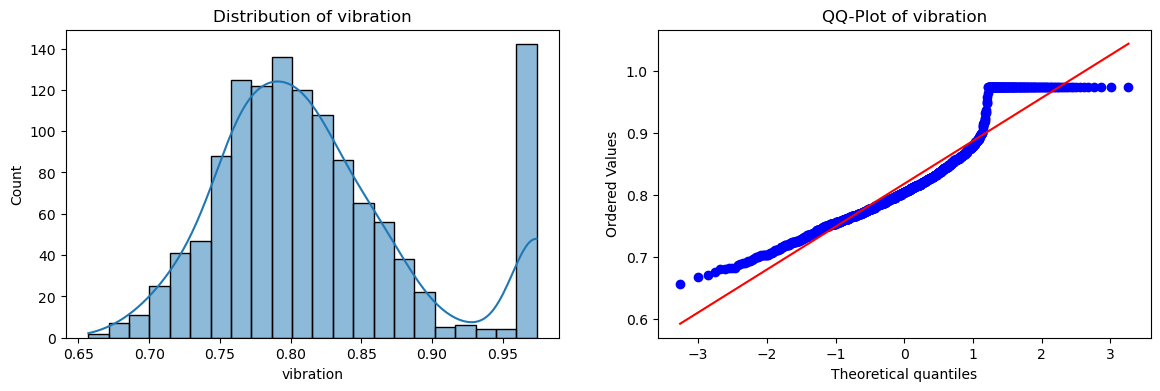

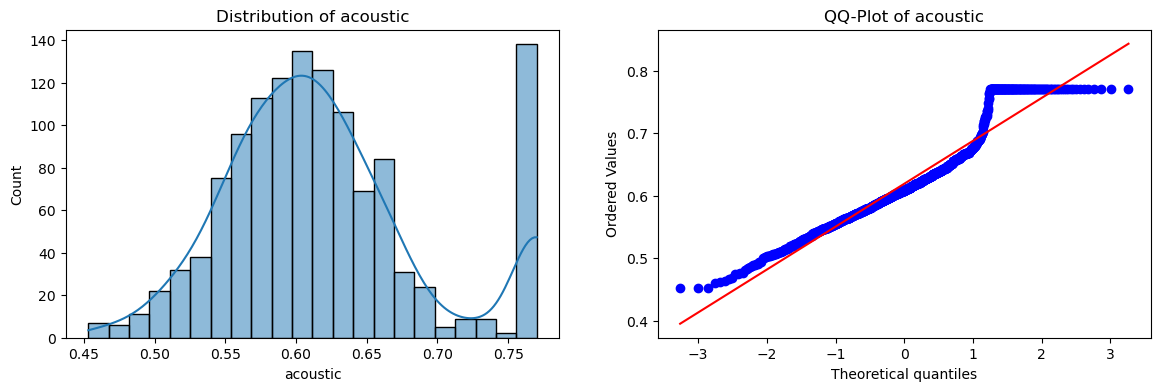

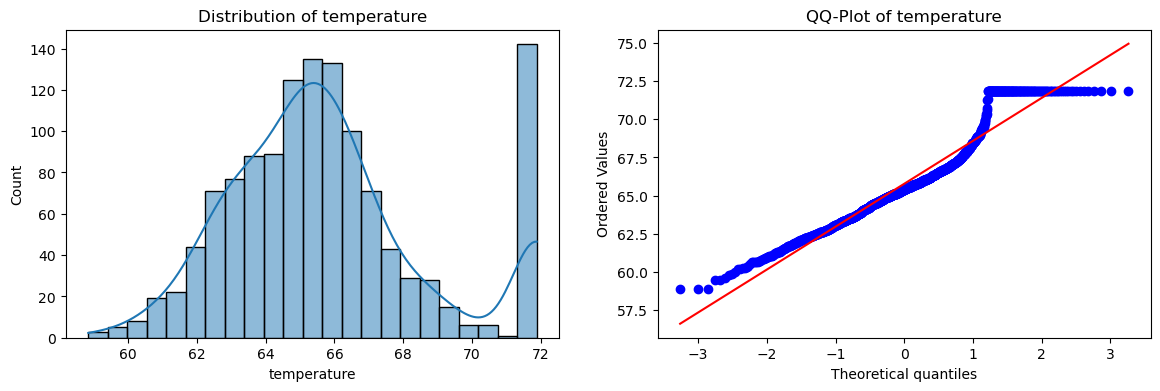

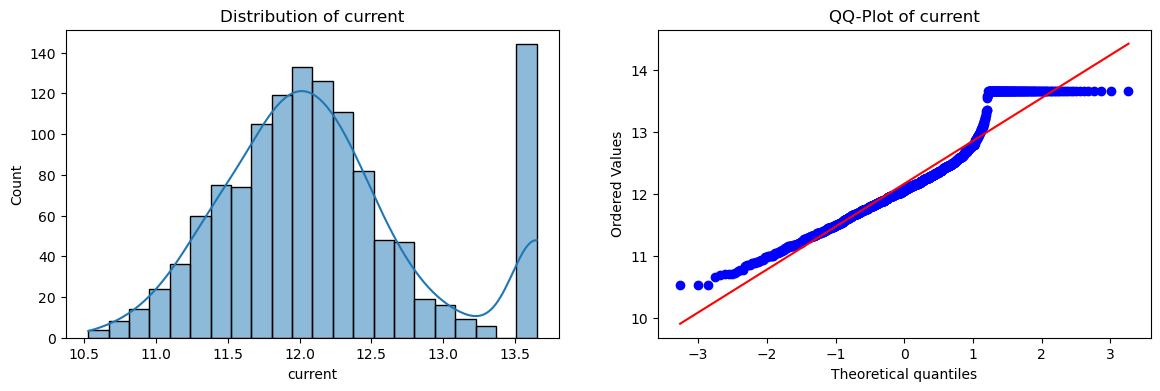

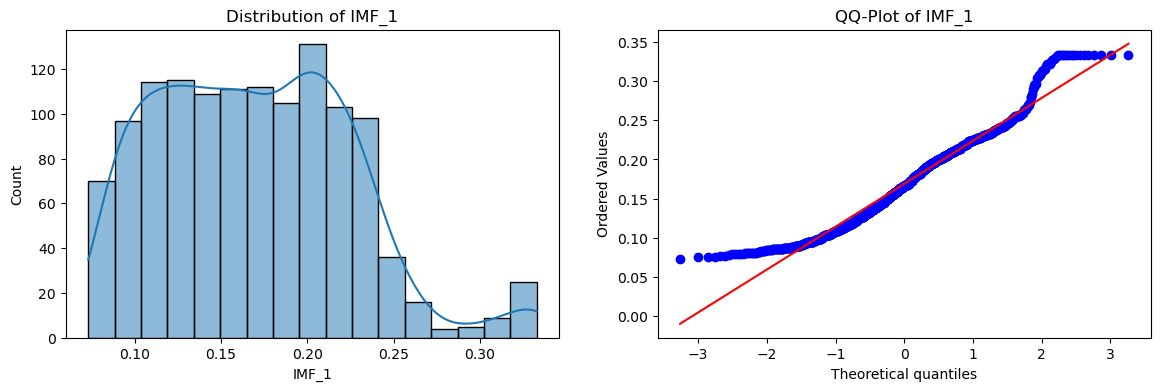

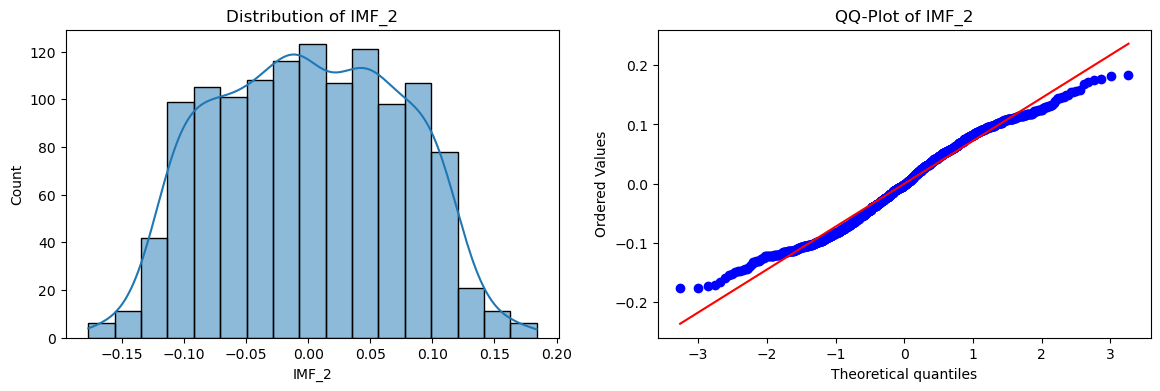

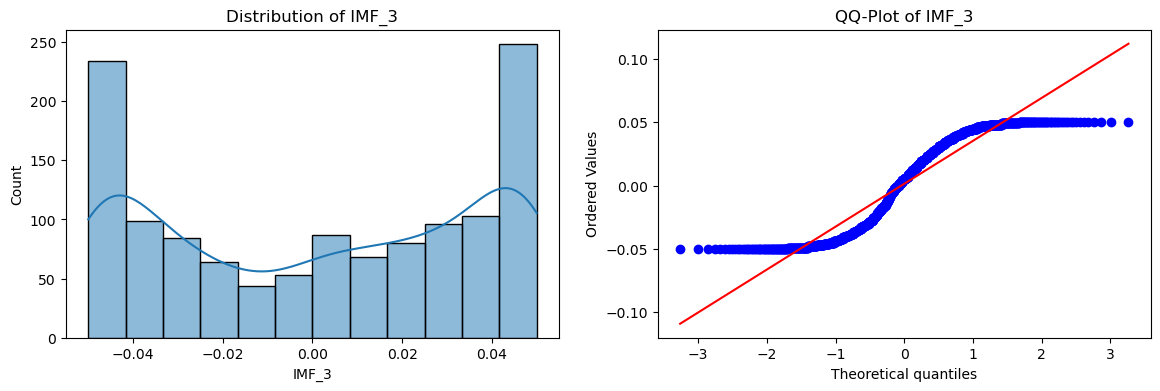

In [31]:
for col in num_cols:
  plt.figure(figsize=(14,4))

  plt.subplot(121)
  sns.histplot(X_train[col], kde=True)
  plt.title(f"Distribution of {col}")

  plt.subplot(122)
  stats.probplot(X_train[col], dist="norm", plot=plt)
  plt.title(f"QQ-Plot of {col}")

  plt.show()

- Interpretation

- From the above plots we can clearly say that columns IMF_1,IMF_2,IMF_3 are not normally distributed

In [32]:
#Applying logtransform
'''
from sklearn.preprocessing import FunctionTransformer
log=FunctionTransformer(np.log1p)
log_cols=['IMF_1','IMF_2','IMF_3']

for i in log_cols:
  X_train[i]=log.fit_transform(X_train[i])

for i in log_cols:
  plt.figure(figsize=(14,4))

  plt.subplot(121)
  sns.histplot(X_train[i],kde=True)
  plt.title(f"Distribution of {i}")

  plt.subplot(122)
  stats.probplot(X_train[i],dist="norm",plot=plt)
  plt.title(f"QQ-Plot of {i}")

plt.show()
'''

'\nfrom sklearn.preprocessing import FunctionTransformer\nlog=FunctionTransformer(np.log1p)\nlog_cols=[\'IMF_1\',\'IMF_2\',\'IMF_3\']\n\nfor i in log_cols:\n  X_train[i]=log.fit_transform(X_train[i])\n\nfor i in log_cols:\n  plt.figure(figsize=(14,4))\n\n  plt.subplot(121)\n  sns.histplot(X_train[i],kde=True)\n  plt.title(f"Distribution of {i}")\n\n  plt.subplot(122)\n  stats.probplot(X_train[i],dist="norm",plot=plt)\n  plt.title(f"QQ-Plot of {i}")\n\nplt.show()\n'

- Interpretation
- After applying log transform there is no drastic change that make the data more normally distributed

In [33]:
# Applying PowerTransform [Yeo-Johnson]
'''
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson')
pow_cols=['IMF_1','IMF_2','IMF_3']

for i in pow_cols:
  df_clean[i]=pt.fit_transform(df_clean[[i]])

for i in pow_cols:
  plt.figure(figsize=(14,4))

  plt.subplot(121)
  sns.histplot(df_clean[i],kde=True)
  plt.title(f"Distribution of {i}")

  plt.subplot(122)
  stats.probplot(df_clean[i],dist="norm",plot=plt)
  plt.title(f"QQ-Plot of {i}")

plt.show()
'''

'\nfrom sklearn.preprocessing import PowerTransformer\npt=PowerTransformer(method=\'yeo-johnson\')\npow_cols=[\'IMF_1\',\'IMF_2\',\'IMF_3\']\n\nfor i in pow_cols:\n  df_clean[i]=pt.fit_transform(df_clean[[i]])\n\nfor i in pow_cols:\n  plt.figure(figsize=(14,4))\n\n  plt.subplot(121)\n  sns.histplot(df_clean[i],kde=True)\n  plt.title(f"Distribution of {i}")\n\n  plt.subplot(122)\n  stats.probplot(df_clean[i],dist="norm",plot=plt)\n  plt.title(f"QQ-Plot of {i}")\n\nplt.show()\n'

- Interpretation
- After Applying Yeo-Jhosnon of PowerTransfromer the Data of IMF_1,IMF_2.IMF_3 moves more towards the Normal Distribution as comapred to logtransform
- So we will use Yeo-Johnson

In [34]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer,FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [35]:
# Applying ColumnTransformer
scaled=['vibration','acoustic','temperature','current']
power=['IMF_1','IMF_2','IMF_3']

trf=ColumnTransformer(
    transformers=[
        ('scaling',StandardScaler(),scaled),
        ('pt+scale',
         Pipeline([
             ('pt',PowerTransformer(method='yeo-johnson')),
             ('scale',StandardScaler())
         ]),power)
    ],remainder='passthrough'
)

# Selecting Base Classification ML Model

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score,recall_score,f1_score,confusion_matrix,ConfusionMatrixDisplay

In [37]:
model1={
    'logistic':LogisticRegression(),
    'KNN':KNeighborsClassifier()
}

In [38]:
model2={
    'DT':DecisionTreeClassifier(),
    'RF':RandomForestClassifier()
}

In [39]:
model3={
    'XGB':XGBClassifier()
}


# Testing Different Classification Model and Checking the Classisfication Metrics

precision_results = {'logistic': 1.0, 'KNN': 1.0}

recall_results = {'logistic': 1.0, 'KNN': 1.0}

f1_results = {'logistic': 1.0, 'KNN': 1.0}
Confusion matrix={'logistic': array([[480,   0],
       [  0,  60]]), 'KNN': array([[480,   0],
       [  0,  60]])}


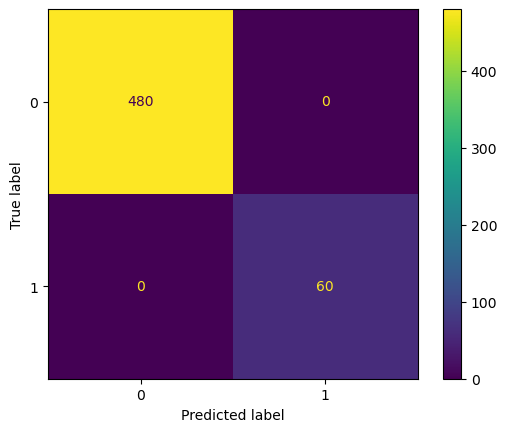

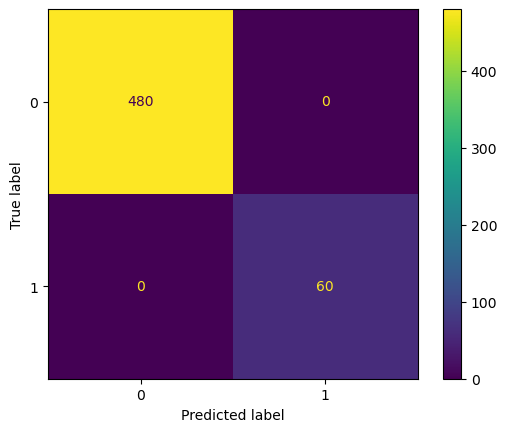

In [40]:
precision={}
recall={}
f1={}
cm={}

for name,model in model1.items():
  p=Pipeline([
      ('trf',trf),
      ('model',model)
  ])
  p.fit(X_train,y_train)
  y_pred=p.predict(X_test)
  precision[name]=precision_score(y_test,y_pred,average='macro')
  recall[name]=recall_score(y_test,y_pred,average='macro')
  f1[name]=f1_score(y_test,y_pred,average='macro')
  cm[name] = confusion_matrix(y_test, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm[name])
  disp.plot()

print(f'precision_results = {precision}\n')
print(f'recall_results = {recall}\n')
print(f'f1_results = {f1}')
print(f'Confusion matrix={cm}')

precision_results = {'DT': 1.0, 'RF': 1.0}

recall_results = {'DT': 1.0, 'RF': 1.0}

f1_results = {'DT': 1.0, 'RF': 1.0}
Confusion matrix={'DT': array([[480,   0],
       [  0,  60]]), 'RF': array([[480,   0],
       [  0,  60]])}


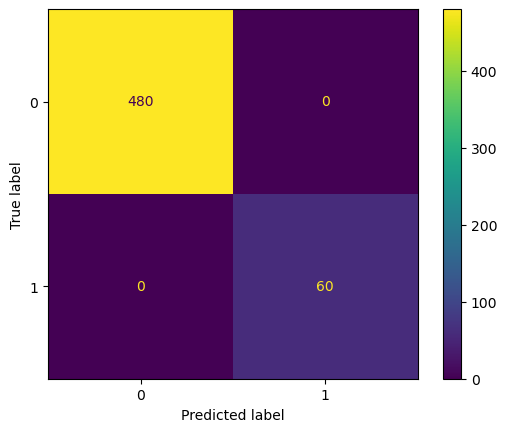

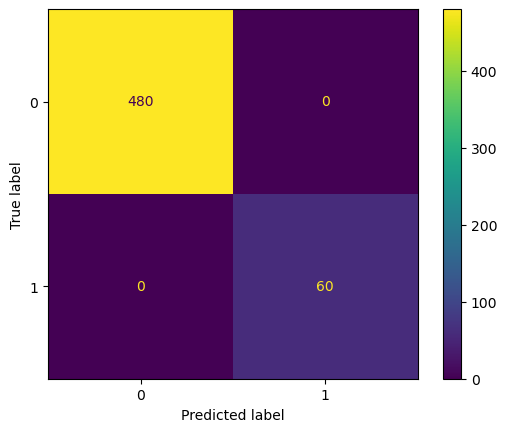

In [41]:
precision={}
recall={}
f1={}
cm={}

for name,model in model2.items():
  p=Pipeline([
      ('trf',trf),
      ('model',model)
  ])
  p.fit(X_train,y_train)
  y_pred=p.predict(X_test)
  precision[name]=precision_score(y_test,y_pred,average='macro')
  recall[name]=recall_score(y_test,y_pred,average='macro')
  f1[name]=f1_score(y_test,y_pred,average='macro')
  cm[name] = confusion_matrix(y_test, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm[name])
  disp.plot()

print(f'precision_results = {precision}\n')
print(f'recall_results = {recall}\n')
print(f'f1_results = {f1}')
print(f'Confusion matrix={cm}')

precision_results = {'XGB': 1.0}

recall_results = {'XGB': 1.0}

f1_results = {'XGB': 1.0}
Confusion matrix={'XGB': array([[480,   0],
       [  0,  60]])}


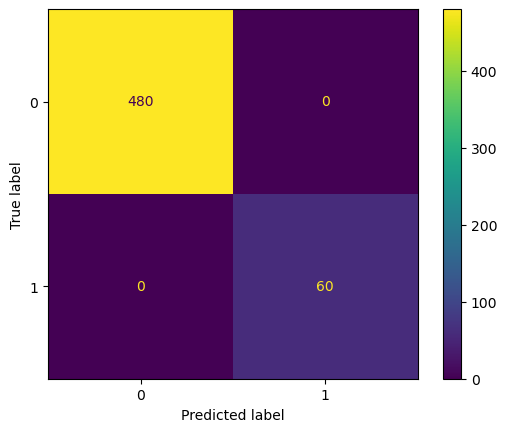

In [42]:
precision={}
recall={}
f1={}
cm={}

for name,model in model3.items():
  p=Pipeline([
      ('trf',trf),
      ('model',model)
  ])
  p.fit(X_train,y_train)
  y_pred=p.predict(X_test)
  precision[name]=precision_score(y_test,y_pred,average='macro')
  recall[name]=recall_score(y_test,y_pred,average='macro')
  f1[name]=f1_score(y_test,y_pred,average='macro')
  cm[name] = confusion_matrix(y_test, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm[name])
  disp.plot()

print(f'precision_results = {precision}\n')
print(f'recall_results = {recall}\n')
print(f'f1_results = {f1}')
print(f'Confusion matrix={cm}')

- Interpretation
- From the above evaluation of Algorithm we will choose XGBClassifier

In [43]:
from sklearn import set_config
set_config(display='diagram')

# Now Creating the Final Pipeline

In [44]:
final_pipeline=Pipeline([
    ('trf',trf),
    ('model',XGBClassifier())
])

In [45]:
final_pipeline.fit(X_train,y_train)

,steps,"[('trf', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('scaling', ...), ('pt+scale', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [46]:
y_pred=final_pipeline.predict(X_test)

# Model Training Completed Now Saving and Importing the Model

In [47]:
import joblib
joblib.dump(final_pipeline,'Machine_efficiency.pkl')
print('Model Saved Successfully')

Model Saved Successfully
